<a href="https://colab.research.google.com/github/Schlager22/FDP_Course/blob/main/Viz_with_Seaborn_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd; pd.set_option('display.max_columns', None) # essentially saying display all columns
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import warnings; warnings.simplefilter('ignore')


Two different libraries for interacting Matplotlib

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/LearnPythonWithFantasyFootball/master/2023/07-Data%20Visualizations/03-Yearly%20Fantasy%20Stats%20-%202022.csv').iloc[:, 1:]
# .iloc indexer for getting a cross section   :,1: is everything but first column
df.head()

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,PassingCmp,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,Int,Fumbles,FumblesLost,2PM,2PP,FantasyPoints
0,Patrick Mahomes*+,KAN,QB,27,17,17,1,1,5250,41,648,435,358,4,61,6,0,12,5,0,1.0,2.0,417.4
1,Josh Jacobs*+,LVR,RB,24,17,17,64,53,0,0,0,0,1653,12,340,400,0,0,3,1,NaN,NaN,328.3
2,Christian McCaffrey*,2TM,RB,26,17,16,108,85,34,1,1,1,1139,8,244,741,5,0,1,0,NaN,NaN,356.4
3,Derrick Henry *,TEN,RB,28,16,16,41,33,4,1,2,2,1538,13,349,398,0,0,6,3,NaN,NaN,302.8
4,Justin Jefferson*+,MIN,WR,23,17,17,184,128,34,0,2,2,24,1,4,1809,8,0,0,0,1.0,NaN,368.7


In [5]:
df.info(verbose = True)

# Object types are strings

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         650 non-null    object 
 1   Tm             650 non-null    object 
 2   Pos            578 non-null    object 
 3   Age            650 non-null    int64  
 4   G              650 non-null    int64  
 5   GS             650 non-null    int64  
 6   Tgt            650 non-null    int64  
 7   Rec            650 non-null    int64  
 8   PassingYds     650 non-null    int64  
 9   PassingTD      650 non-null    int64  
 10  PassingAtt     650 non-null    int64  
 11  PassingCmp     650 non-null    int64  
 12  RushingYds     650 non-null    int64  
 13  RushingTD      650 non-null    int64  
 14  RushingAtt     650 non-null    int64  
 15  ReceivingYds   650 non-null    int64  
 16  ReceivingTD    650 non-null    int64  
 17  Int            650 non-null    int64  
 18  Fumbles   

In [8]:
rb_df = df.loc[df['Pos'] == 'RB']
rb_df['Usage'] = rb_df['Tgt'] + rb_df['RushingAtt']
rb_df['Usage/G'] = rb_df['Usage']/rb_df['G']
rb_df['FantasyPoints/G'] = rb_df['FantasyPoints']/rb_df['G']
rb_df.head(10)

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,PassingCmp,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,Int,Fumbles,FumblesLost,2PM,2PP,FantasyPoints,Usage,Usage/G,FantasyPoints/G
1,Josh Jacobs*+,LVR,RB,24,17,17,64,53,0,0,0,0,1653,12,340,400,0,0,3,1,NaN,NaN,328.3,404,23.764706,19.311765
2,Christian McCaffrey*,2TM,RB,26,17,16,108,85,34,1,1,1,1139,8,244,741,5,0,1,0,NaN,NaN,356.4,352,20.705882,20.964706
3,Derrick Henry *,TEN,RB,28,16,16,41,33,4,1,2,2,1538,13,349,398,0,0,6,3,NaN,NaN,302.8,390,24.375000,18.925000
5,Austin Ekeler,LAC,RB,27,17,17,127,107,0,0,0,0,915,13,204,722,5,0,5,3,NaN,NaN,372.7,331,19.470588,21.923529
9,Nick Chubb*,CLE,RB,27,17,17,37,27,0,0,0,0,1525,12,302,239,1,0,1,1,1.0,NaN,281.4,339,19.941176,16.552941
14,Saquon Barkley*,NYG,RB,25,16,16,76,57,0,0,0,0,1312,10,295,338,0,0,1,0,1.0,NaN,284.0,371,23.187500,17.750000
17,Jamaal Williams,DET,RB,27,17,9,16,12,0,0,0,0,1066,17,262,73,0,0,3,2,1.0,NaN,225.9,278,16.352941,13.288235
19,Tony Pollard*,DAL,RB,25,16,4,55,39,0,0,0,0,1007,9,193,371,3,0,0,0,NaN,NaN,248.8,248,15.500000,15.550000
20,Dalvin Cook*,MIN,RB,27,17,17,56,39,0,0,0,0,1173,8,264,295,2,0,4,4,NaN,NaN,237.8,320,18.823529,13.988235
21,Miles Sanders*,PHI,RB,25,17,15,26,20,0,0,0,0,1269,11,259,78,0,0,2,2,NaN,NaN,216.7,285,16.764706,12.747059


In [11]:
import matplotlib.style as style
style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

<Axes: xlabel='RushingAtt', ylabel='Tgt'>

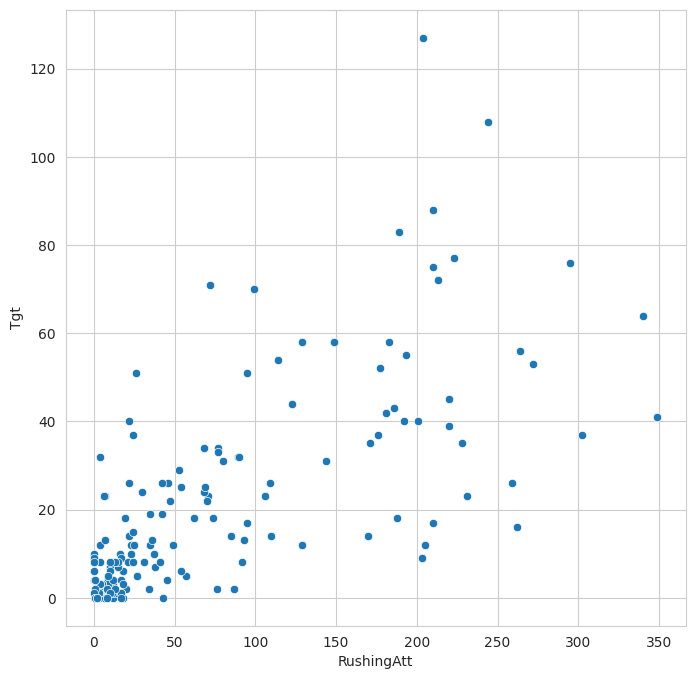

In [10]:
#Function within pyplot module, this si the canvas
# Axis live within figures
plt.figure(figsize=(8,8))
sns.set_style('whitegrid')
sns.scatterplot(x=rb_df['RushingAtt'], y=rb_df['Tgt'])

In [ ]:
# Five thirty eight WIP***
style.use('fivethirtyeight')
rb_df.plot(x=rb_df['RushingAtt'],y=rb_df['Tgt'], figsize=(12,8))

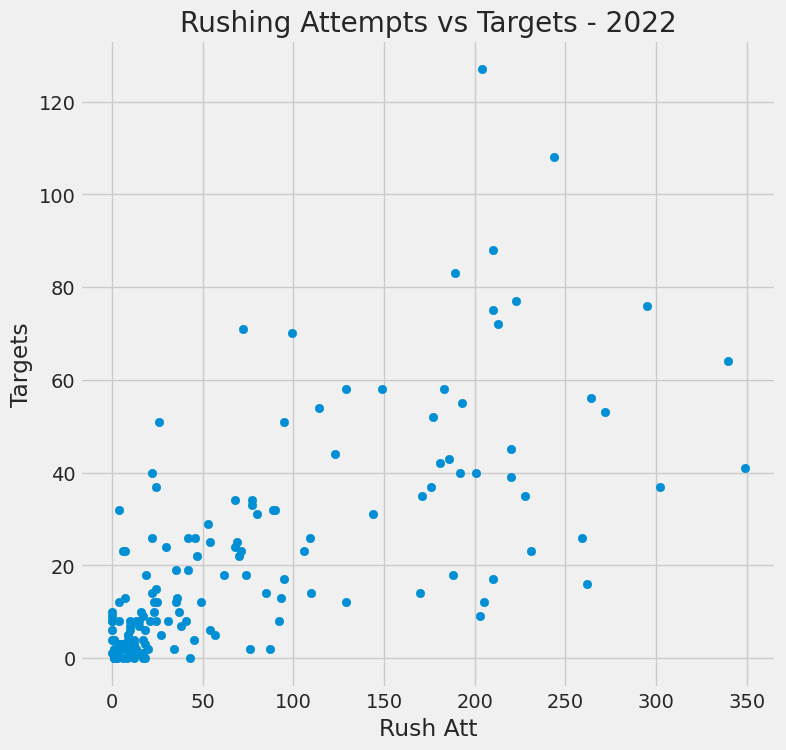

In [16]:
plt.figure(figsize=(8,8))
plt.scatter(rb_df['RushingAtt'],rb_df['Tgt']);
plt.xlabel('Rush Att');
plt.ylabel('Targets');
plt.title('Rushing Attempts vs Targets - 2022');

# Customization lean towards mat plot lib

<Axes: xlabel='Usage/G', ylabel='FantasyPoints/G'>

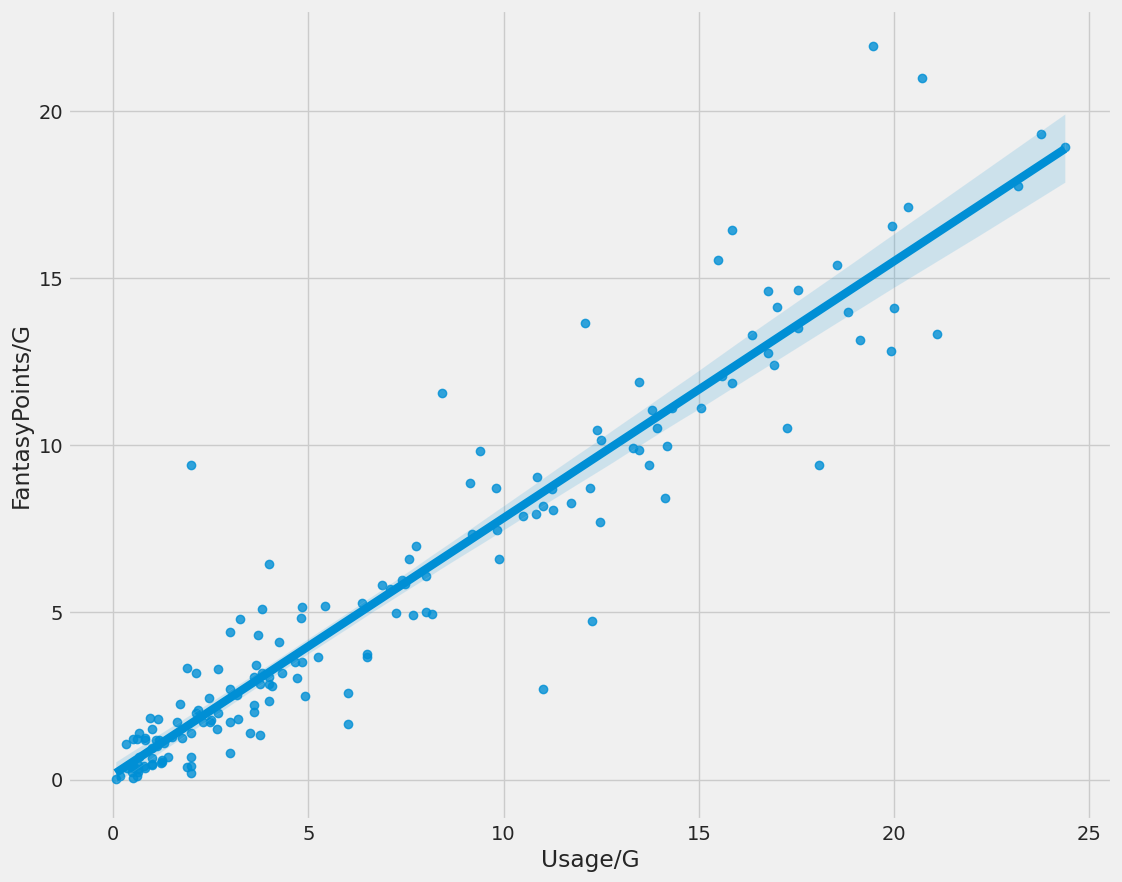

In [19]:
plt.figure(figsize=(12,10))
sns.regplot(x=rb_df['Usage/G'],y=rb_df['FantasyPoints/G'])

<Axes: xlabel='RushingAtt', ylabel='Density'>

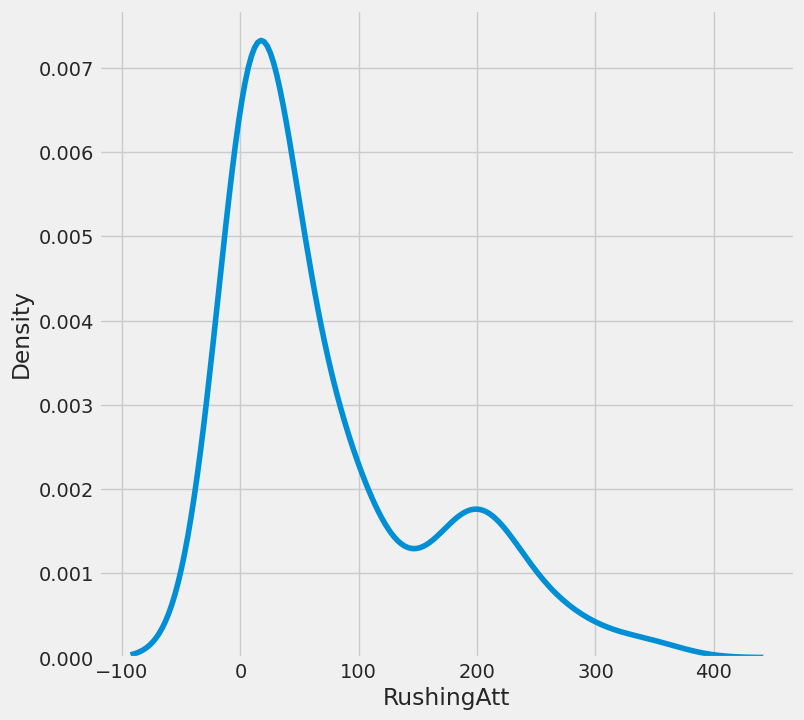

In [21]:
# Density plot
# Visualize distribution of data - continuous curve similar to histogram
plt.figure(figsize=(8,8))
sns.kdeplot(rb_df['RushingAtt'])
# case matters for columns here

<Figure size 800x800 with 0 Axes>

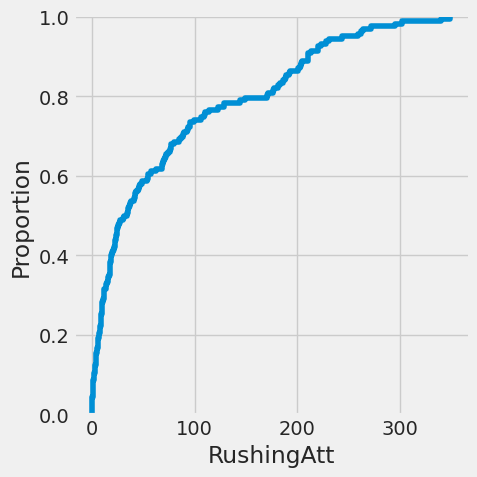

In [27]:
plt.figure(figsize=(8,8))
sns.displot(rb_df['RushingAtt'], kind='ecdf')
#About 60% of RB have less than 50 Rushing Att

<Figure size 800x800 with 0 Axes>

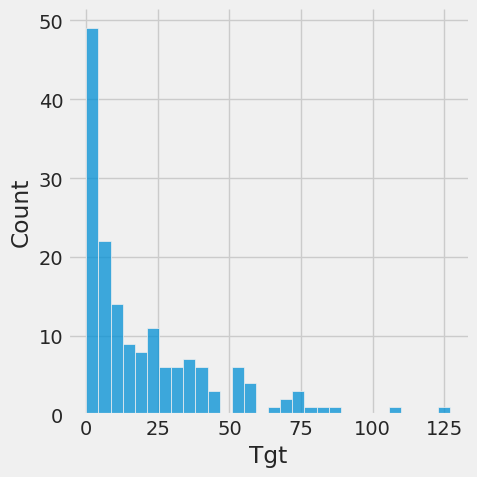

In [28]:
# Histogram
plt.figure(figsize=(8,8))
sns.displot(rb_df['Tgt'], bins = 30)

In [22]:
# Example with everyone and multiple plots per grid
det_df = df
det_df['Usage'] = det_df['Tgt'] + det_df['RushingAtt']
det_df['Usage/G'] = det_df['Usage']/det_df['G']
det_df['FantasyPoints/G'] = det_df['FantasyPoints']/det_df['G']

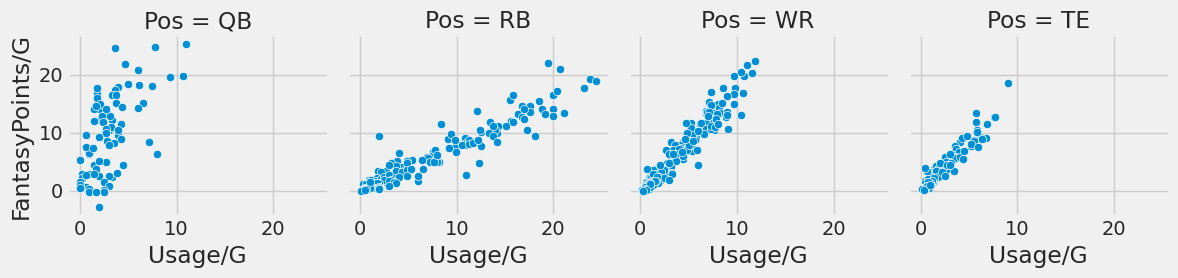

In [24]:
g = sns.FacetGrid(det_df, col='Pos')
g.map(sns.scatterplot,'Usage/G','FantasyPoints/G')

<Axes: xlabel='RushingAtt', ylabel='Tgt'>

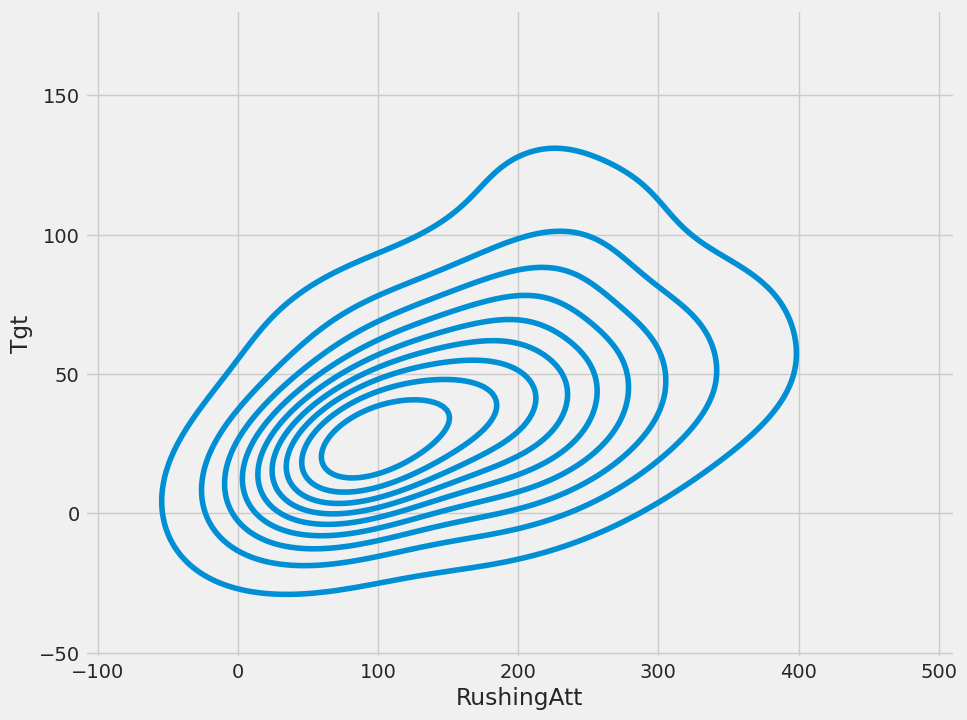

In [31]:
fig, ax = plt.subplots(figsize=(10,8))
rb_df_filtered = rb_df.loc[rb_df['RushingAtt'] > 50]
sns.kdeplot(x=rb_df_filtered['RushingAtt'],y=rb_df_filtered['Tgt'], ax=ax,bw_method=0.7)

<Axes: xlabel='RushingAtt', ylabel='Tgt'>

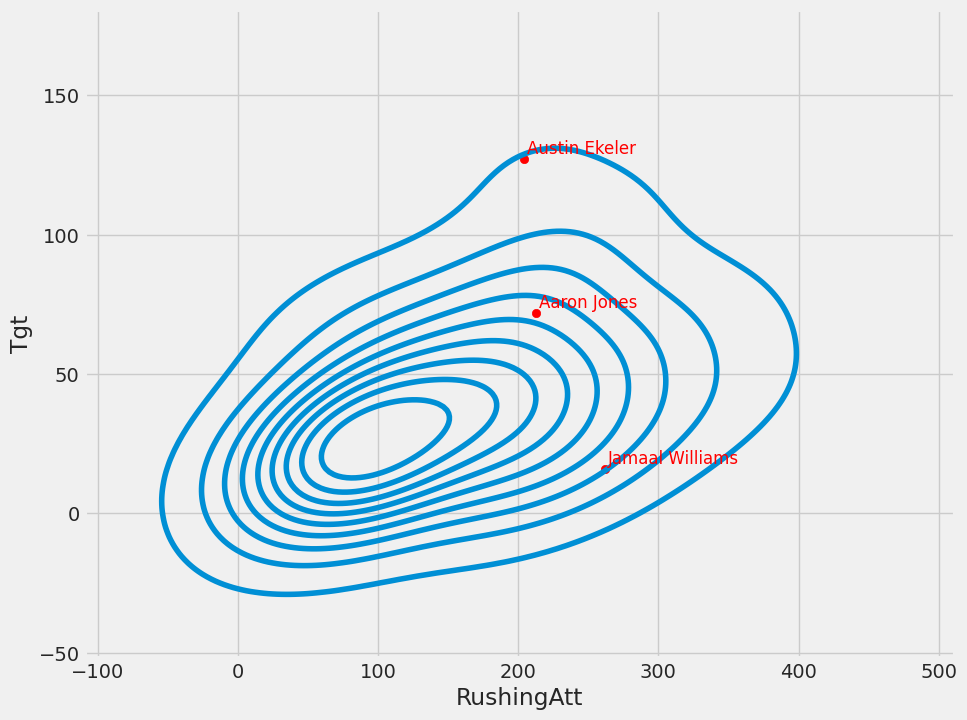

In [33]:
fig, ax = plt.subplots(figsize=(10,8))
notable_players = ['Austin Ekeler','Aaron Jones','Jamaal Williams']

for player_name in notable_players:
  player = rb_df_filtered.loc[rb_df_filtered['Player'] == player_name]
  if not player.empty:
    target = player['Tgt']
    rushes = player['RushingAtt']

    ax.annotate(player_name, xy=(rushes+2, target+2), color='red', fontsize=12)
    ax.scatter(rushes, target, color='red')

rb_df_filtered = rb_df.loc[rb_df['RushingAtt'] > 50]
sns.kdeplot(x=rb_df_filtered['RushingAtt'],y=rb_df_filtered['Tgt'], ax=ax,bw_method=0.7)

Text(0.5, 1.0, 'Residual Plot')

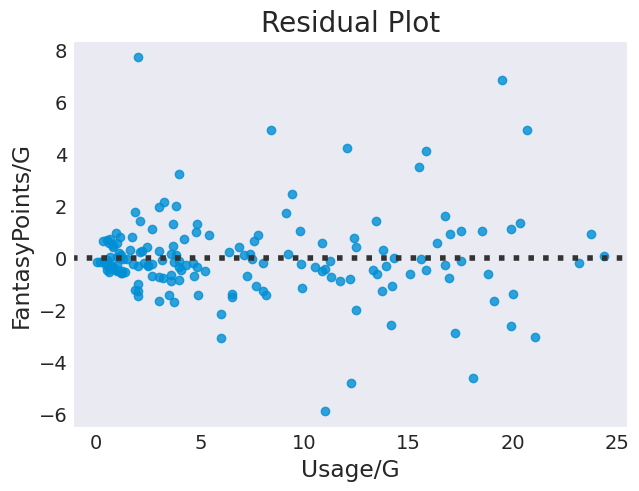

In [34]:
# Want variance to remain constant throughout

sns.set_style('dark')

sns.residplot(x=rb_df['Usage/G'], y=rb_df['FantasyPoints/G'])
plt.title('Residual Plot')

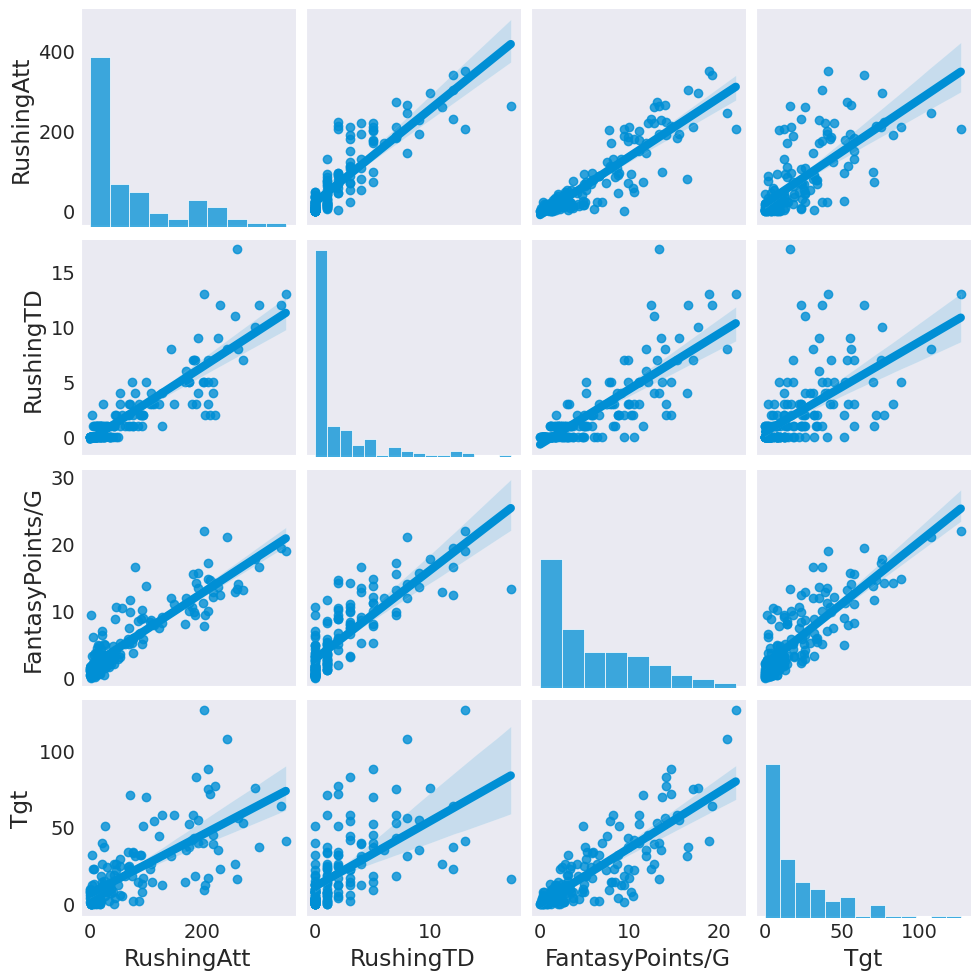

In [36]:
rb_df_copy = rb_df[['RushingAtt', 'RushingTD','FantasyPoints/G','Tgt']]
sns.pairplot(rb_df_copy, kind='reg')